In [2]:
import pandas as pd
import numpy as np

In [3]:
df_initial = pd.read_csv("data.csv",encoding='latin1')
print('Dataframe dimensions:', df_initial.shape)

Dataframe dimensions: (541909, 8)


In [4]:
df_initial.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## 1. Data Cleaning

### 1.1 Handling Missing Value

In [5]:
tab_info=pd.DataFrame(df_initial.dtypes).T.rename(index={0:'Type'})
tab_info=tab_info.append(pd.DataFrame(df_initial.isnull().sum()).T.rename(index={0:'The Amount of Missing Values'}))
tab_info=tab_info.append(pd.DataFrame(df_initial.isnull().sum()/df_initial.shape[0]*100).T.
                         rename(index={0:'Ratio of Missing Values'}))
display(tab_info)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Type,object,object,object,int64,object,float64,float64,object
The Amount of Missing Values,0,0,1454,0,0,0,135080,0
Ratio of Missing Values,0.0,0.0,0.268311,0.0,0.0,0.0,24.926694,0.0


Description is the text Description of the product, which is not the focus of our analysis. There are 1454 empty values, which will not be processed.

CustomerID is the customer's unique number, which is very important. 135,080 lines are missing, nearly 1/5 of the total number of lines. The missing value was deleted because the cause of the missing value could not be determined


In [6]:
df_initial.dropna(axis = 0, subset = ['CustomerID'], inplace = True)#axis=0:drop rows
print('Dataframe dimensions:', df_initial.shape)

Dataframe dimensions: (406829, 8)


In [8]:
df_initial.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### 1.2 Handling Duplicated Values

In [11]:
print('Duplicated amount: {}'.format(df_initial.duplicated().sum()))

Duplicated amount: 5225


In [12]:
df_initial.drop_duplicates(inplace=True)

### 1.3 Time consistency processing

First convert InvoiceTime to datetime, a time format that pandas can handle:

In [14]:
df_initial['InvoiceDate']=pd.to_datetime(df_initial['InvoiceDate'], errors='coerce')

In [15]:
df_initial['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 401604, dtype: datetime64[ns]

In [16]:
df_initial.rename(columns={'InvoiceDate':'InvoiceTime'},inplace=True)

In [17]:
df_initial['Date']=pd.to_datetime(df_initial['InvoiceTime'].dt.date,errors='coerce')#errors='coerce' means return NA when it cannot be deal with in datetime

In [18]:
df_initial['Date']

0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
541904   2011-12-09
541905   2011-12-09
541906   2011-12-09
541907   2011-12-09
541908   2011-12-09
Name: Date, Length: 401604, dtype: datetime64[ns]

In [26]:
df_initial['Month']=df_initial['InvoiceTime'].dt.month

In [27]:
df_initial['Month']

0         2010-12-01
1         2010-12-01
2         2010-12-01
3         2010-12-01
4         2010-12-01
             ...    
541904    2011-12-09
541905    2011-12-09
541906    2011-12-09
541907    2011-12-09
541908    2011-12-09
Name: Month, Length: 401604, dtype: object

Check whether it has null values

In [28]:
df_initial.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceTime    0
UnitPrice      0
CustomerID     0
Country        0
Date           0
Month          0
dtype: int64

### 1.4 Handling Data Type

In [29]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceTime  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   Date         401604 non-null  datetime64[ns]
 9   Month        401604 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 33.7+ MB


In [31]:
df_initial=df_initial.convert_dtypes()

In [32]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  string        
 1   StockCode    401604 non-null  string        
 2   Description  401604 non-null  string        
 3   Quantity     401604 non-null  Int64         
 4   InvoiceTime  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  Float64       
 6   CustomerID   401604 non-null  Int64         
 7   Country      401604 non-null  string        
 8   Date         401604 non-null  datetime64[ns]
 9   Month        401604 non-null  object        
dtypes: Float64(1), Int64(2), datetime64[ns](2), object(1), string(4)
memory usage: 34.9+ MB


Add sumprice as a new column:

In [33]:
df_initial['SumPrice']=df_initial['Quantity']*df_initial['UnitPrice']

### 1.5 Handling outliers

In [36]:
df_initial.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,401604.0,12.183273,250.283037,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,401604.0,3.474064,69.764035,0.0,1.25,1.95,3.75,38970.0
CustomerID,401604.0,15281.160818,1714.006089,12346.0,13939.00,15145.00,16784.00,18287.0
SumPrice,401604.0,20.613638,430.352218,-168469.6,4.25,11.70,19.80,168469.6


* The minimun of Quantity and SumPrice are negative
* The minimun of UnitPrice is 0

### 1.5.1 C-word Cancel Order

In [37]:
#Check the row which Quantity is less than 0
df_initial[(df_initial['Quantity']<=0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceTime,UnitPrice,CustomerID,Country,Date,Month,SumPrice
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.5,14527,United Kingdom,2010-12-01,2010-12-01,-27.5
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,2010-12-01,2010-12-01,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,2010-12-01,2010-12-01,-19.8
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,2010-12-01,2010-12-01,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,2010-12-01,2010-12-01,-6.96
...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,2011-12-09,2011-12-09,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,2011-12-09,2011-12-09,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,2011-12-09,2011-12-09,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,2011-12-09,2011-12-09,-1.25


Notice that the negative quanlity is mainly caused by the C-word orders (cancelled orders)

* The negative value of cancellations can interfere with the analysis of sales peformance.

* Consider splitting the data into only successful orders and only cancellations.

* It is necessary to explore whether the cancellation is a modification made directly on the original order or used to offset the new data of the original order.

Thus, Sales_df is divided into successful orders and cancelled orders according to whether the invoice number InvoiceNo contains "C" :



In [39]:
query_c=df_initial['InvoiceNo'].str.contains('C')

In [40]:
#Only included cancel order
sales_cancel=df_initial.loc[query_c,:].copy()

In [41]:
#Only included success order
sales_success=df_initial.loc[-query_c,:].copy()

Add a field SrcInvoiceNo for sales_cancel to hold the invoice number with the "C" removed:

In [42]:
#Add a new column
sales_cancel['SrcInvoiceNo'] = sales_cancel['InvoiceNo'].str.split('C',expand=True)[1]

In [43]:
print('Before merge,the shape of sales_cancel：{}'.format(sales_cancel.shape))
print('Before merge,the shape of sales_success：{}'.format(sales_success.shape))
new_data = pd.merge(sales_cancel, sales_success, left_on='SrcInvoiceNo',right_on='InvoiceNo')
print('After merge, the shape of new_data：{}'.format(new_data.shape))


Before merge,the shape of sales_cancel：(8872, 12)
Before merge,the shape of sales_success：(392732, 11)
After merge, the shape of new_data：(0, 23)


We can confirm that there is no correspondence between a cancelled order and a successful order. Thus, we can use sales_success in the following analytics.

### 1.5.2 Free Order-UnitPrice is 0

It is speculated that the order with the unit price of 0 is a gift for promotional activities, which interferes with the calculation of order quantity, unit price, joint rate and other indicators. Therefore, a separate table is also set up for storage, and then the free order is analyzed:

In [46]:
query_free=sales_success['UnitPrice']==0

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: UnitPrice, Length: 392732, dtype: boolean

In [45]:
#Only include free order
sales_cancel=sales_success.loc[query_free,:].copy()

In [49]:
#Only include normal order
sales_success=sales_success.loc[-query_free,:]
sales_success

,InvoiceNo,StockCode,Description,Quantity,InvoiceTime,UnitPrice,CustomerID,Country,Date,Month,SumPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010-12-01,15.3
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,2010-12-01,22.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,20.34
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011-12-09,2011-12-09,10.2
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.1,12680,France,2011-12-09,2011-12-09,12.6
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-09,2011-12-09,16.6
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-09,2011-12-09,16.6


In [48]:
sales_success.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,392692.0,13.119702,180.492832,1.000,2.00,6.00,12.00,80995.00
UnitPrice,392692.0,3.125914,22.241836,0.001,1.25,1.95,3.75,8142.75
CustomerID,392692.0,15287.843865,1713.539549,12346.000,13955.00,15150.00,16791.00,18287.00
SumPrice,392692.0,22.631500,311.099224,0.001,4.95,12.45,19.80,168469.60


## 2.Analytics and Visualization

### 2.1 Sales Situation and Description Statistic

#### 2.1.1 Check each order information

First group Sales_SUCCESS by order number and sum Quantity Quantity and SumPrice:

In [52]:
invoice_grouped=sales_success.groupby('InvoiceNo')[['Quantity','SumPrice']].sum()

In [54]:
invoice_grouped.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,18532.0,278.00572,972.389641,1.00,74.00,154.000,290.00,80995.0
SumPrice,18532.0,479.56016,1678.082580,0.38,157.34,302.575,469.57,168469.6


* A total of 18,532 valid orders were generated within the statistical period (From December 1, 2010 to December 9, 2011)

* The average transaction value per order was £479.56, and the average number of items purchased per order was about 278, indicating that orders were mainly wholesale

* The mean value of order transaction amount and the number of goods in the order are both higher than the median, and the mean value of order transaction amount is even higher than Q3 quantile, **indicating that the overall difference of orders is large, and there are some customers with strong purchasing power**

#### 2.1.2 Check Customer Information

Count the order quantity, consumption amount and purchase quantity of each customer.

Common methods:

(1) Group by customer ID and order number

(2) Sum up the quantity and sales amount of the same order;

(3) reset_index; Finally, group them by customer ID:

In [63]:
#(1) Group by customer ID and order number

#(2) Sum up the quantity and sales amount of the same order;
customer_grouped=sales_success.groupby(['CustomerID','InvoiceNo'])[['Quantity', 'SumPrice']].sum()

In [64]:
#(3) reset_index; 
customer_grouped.reset_index(['InvoiceNo'],inplace=True) 
customer_grouped.head() 


,InvoiceNo,Quantity,SumPrice
CustomerID,,,
12346,541431,74215,77183.6
12347,537626,319,711.79
12347,542237,315,475.39
12347,549222,483,636.25
12347,556201,196,382.52


In [67]:
#Finally, group them by customer ID:
customer_grouped.groupby('CustomerID')[['Quantity', 'SumPrice']].sum().describe()

,Quantity,SumPrice
count,4338.000000,4338.000000
mean,1187.644537,2048.688081
std,5043.619654,8985.230220
min,1.000000,3.750000
25%,159.000000,306.482500
50%,378.000000,668.570000
75%,989.750000,1660.597500
max,196915.000000,280206.020000


In [68]:
customer_grouped.groupby('CustomerID')[['InvoiceNo']].count().describe()

,InvoiceNo
count,4338.000000
mean,4.272015
std,7.697998
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,209.000000


The average purchase per customer was 1,187 items, even exceeding the Q3 quartile of 989.7 items. The largest number of items purchased by customers was 196,915; At £2,049, the average also exceeded the Q3 quantile.

**It shows that there is a big gap in purchasing power of customers, and a small number of high-consumption users have raised the per capita value.**

The average order number of purchases for each customer was 4, and the median was 2. More than 25% of customers only placed an order once and did not retain it.

#### 2.1.3 Check Product Information

First, group the products according to the product number, sum the quantity and total price respectively, that is, get the total sales amount and total sales volume of the corresponding products, take the quotient to get the average price:

In [69]:
goods_grouped = sales_success.groupby('StockCode')[['Quantity', 'SumPrice']].sum()
goods_grouped['AvgPrice'] = goods_grouped['SumPrice'] / goods_grouped['Quantity']
goods_grouped.head()


,Quantity,SumPrice,AvgPrice
StockCode,,,
10002,823,699.55,0.85
10080,291,114.41,0.393162
10120,192,40.32,0.21
10123C,5,3.25,0.65
10124A,16,6.72,0.42


Check the distribution of avg prices for all items and observe the price positioning of the store:

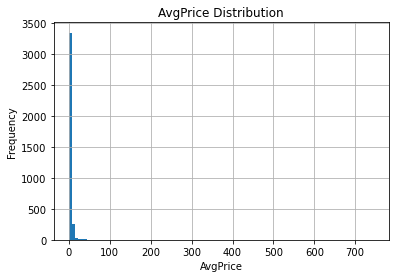

In [71]:
import matplotlib.pyplot as plt
goods_grouped.AvgPrice.hist(bins=100)
plt.title('AvgPrice Distribution')
plt.ylabel('Frequency')
plt.xlabel('AvgPrice')
plt.show()

It is found that the price of goods is basically concentrated within 100 pounds, and a very small number of sky-high goods are observed. After screened out sky-high goods, the average price distribution of goods within 100 pounds is observed:

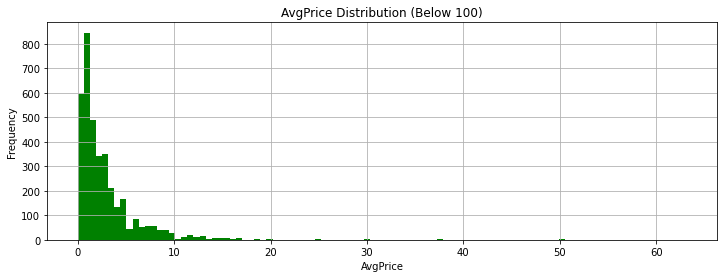

In [72]:
plt.figure()
goods_grouped[goods_grouped.AvgPrice < 100].AvgPrice.hist(bins=100,figsize = (12, 4),color='g')
plt.title('AvgPrice Distribution (Below 100)')
plt.ylabel('Frequency')
plt.xlabel('AvgPrice')
plt.show()

The peak value is 1-2 pounds, and the unit price of goods above 10 pounds is very rare. **It seems that the e-commerce is mainly positioned as a small commodity market with low prices.**

Next look at the scatter chart of unit price and unit sales to see which price items are more popular:

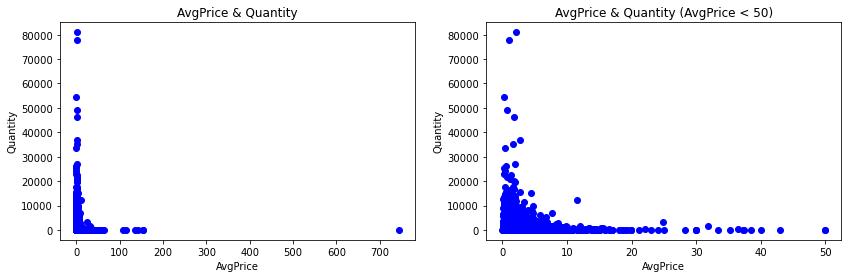

In [73]:
# Scatter plot of unit price and quantity sold
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.scatter(goods_grouped['AvgPrice'], goods_grouped['Quantity'], color = 'b')
plt.title('AvgPrice & Quantity')
plt.ylabel('Quantity')
plt.xlabel('AvgPrice')

plt.subplot(122)
plt.scatter(goods_grouped[goods_grouped.AvgPrice < 50]['AvgPrice'], goods_grouped[goods_grouped.AvgPrice < 50]['Quantity'], color = 'b')
plt.title('AvgPrice & Quantity (AvgPrice < 50)')
plt.ylabel('Quantity')
plt.xlabel('AvgPrice')
plt.show()

**Judging from the sales quantity of the products, there is no doubt that the products in the low-price area under 5 pounds are favored by customers.**

So do the cheaper items actually lead to the most sales? Plot the scatter plot of unit price and total sales:

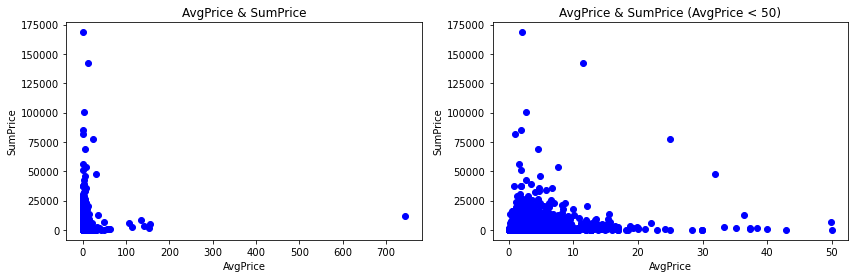

In [74]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.scatter(goods_grouped['AvgPrice'], goods_grouped['SumPrice'], color = 'b')
plt.title('AvgPrice & SumPrice')
plt.ylabel('SumPrice')
plt.xlabel('AvgPrice')

plt.subplot(122)
plt.scatter(goods_grouped[goods_grouped.AvgPrice < 50]['AvgPrice'], goods_grouped[goods_grouped.AvgPrice < 50]['SumPrice'], color = 'b')
plt.title('AvgPrice & SumPrice (AvgPrice < 50)')
plt.ylabel('SumPrice')
plt.xlabel('AvgPrice')
plt.show()

Low-price area of goods not only in the number of sales, but also constitute the main part of sales; High-priced items, with high unit prices but low sales, didn't bring in much sales. 

**Suggestion:** It is suggested that the procurement department of the platform can select more products priced below 10 pounds to further expand the category of low-price area.

## 2.2 Analysis of Customer Consumption Behavior

#### 2.2.1 Customer life cycle

In fact, many of the customers in the sample did not complete their life cycle, and we do not know whether they made purchases before the statistical period, nor which of them will continue to make purchases after the statistical period. So the life cycle calculated here is limited, and the real average customer life cycle is necessarily longer.

In [78]:
#View the user's first and last (most recent) consumption time:
#View the user's first consumption time:
mindate=df_initial.groupby('CustomerID')[['Date']].min()

In [76]:
mindate

,Date
CustomerID,
12346,2011-01-18
12347,2010-12-07
12348,2010-12-16
12349,2011-11-21
12350,2011-02-02
...,...
18280,2011-03-07
18281,2011-06-12
18282,2011-08-05


In [ ]:
#View the user's last consumption time:

In [79]:
maxdate=df_initial.groupby('CustomerID')[['Date']].max()

In [82]:
#To see which dates the user focused their first/last purchases:
mindate['Date'].value_counts().head(10)

2010-12-02    108
2010-12-01     98
2010-12-08     87
2010-12-09     83
2010-12-06     76
2010-12-05     68
2010-12-16     58
2010-12-07     53
2010-12-03     49
2010-12-15     49
Name: Date, dtype: int64

In [83]:
maxdate['Date'].value_counts().head(10)


2011-12-08    116
2011-12-06    113
2011-12-01    105
2011-12-05     97
2011-12-07     95
2011-11-30     82
2011-12-02     75
2011-11-29     75
2011-11-22     73
2011-11-17     62
Name: Date, dtype: int64

It was found that the high frequency date of the first consumption was at the beginning of the statistical period, and the high frequency date of the last consumption was at the end of the statistical period. It means that there are a lot of users whose life cycles are underestimated and actually stretch backwards and forwards.

The life cycle within the statistical period is obtained by subtracting the date of the last consumption from the date of the first consumption, showing the first 5 lines:

In [84]:
(maxdate - mindate).head()

,Date
CustomerID,
12346,0 days
12347,365 days
12348,283 days
12349,0 days
12350,0 days


0 days Indicates that the customer spends money only on a day.

Take another look at the overall customer life cycle:

In [85]:
life_time = maxdate - mindate
life_time.describe()

,Date
count,4372
mean,133 days 17:21:08.069533394
std,133 days 00:00:40.912806660
min,0 days 00:00:00
25%,0 days 00:00:00
50%,98 days 00:00:00
75%,256 days 00:00:00
max,373 days 00:00:00


There were 4372 customers with CustomerID, and the average life cycle was 133 days and the median was 98 days, indicating that some loyal customers with a long life cycle pushed up the average value. However, both the minimum value and Q1 quantile are 0 days, indicating that more than 25% customers consume only once, and the distribution of life cycle is polarized.

Next, draw a bar chart to see the actual distribution of the customer life cycle.

The time difference here is of type Timedelta and cannot be plotted on a bar chart. Convert it to a value first:

In [86]:
life_time['life_time'] = life_time['Date'].dt.days  # .dt.days提取出来就是数值了！

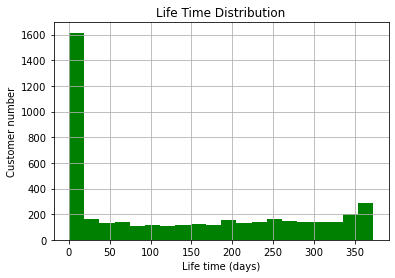

In [87]:
life_time['life_time'].hist(bins=20, color='g')
plt.title('Life Time Distribution')
plt.ylabel('Customer number')
plt.xlabel('Life time (days)')
plt.show()

The abscissa represents the number of days in the life cycle, and the ordinate represents the number of customers in the life cycle.

Many customers only consume once and are not retained. Therefore, we need to pay more attention to customers' first purchase experience. We can learn about the dissatisfaction of new customers in the purchase process through service evaluation and customer service telephone inquiry, and make targeted improvements. At the same time, new customers should adopt measures to attract second purchases, such as issuing time-limited coupons. Interestingly, a sub-peak occurs around 350 days, so let's exclude customers with a life cycle of 0 days and look at the distribution:

Increase the group size to 100 and widen the size of the diagram

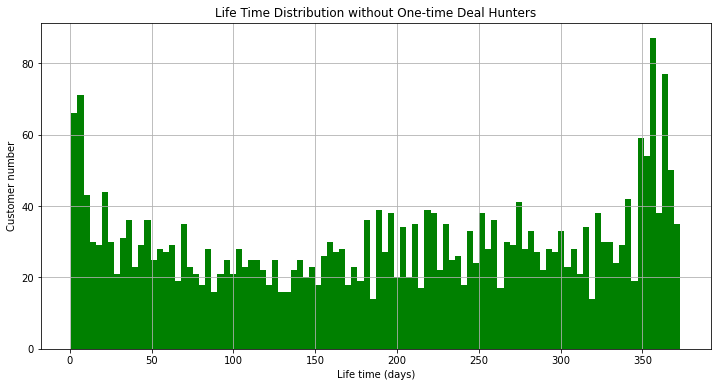

In [88]:
plt.figure()
life_time[life_time['life_time'] > 0].life_time.hist(bins = 100, figsize = (12, 6), color = 'g')
plt.title('Life Time Distribution without One-time Deal Hunters')
plt.ylabel('Customer number')
plt.xlabel('Life time (days)')
plt.show()

Average lifetime of users who spend twice or more:

In [89]:
life_time[life_time['life_time']>0].life_time.mean()

195.4653961885657

The average life span of users who made two or more purchases was 195 days, much higher than the population average of 133 days. From the perspective of strategy, users should spend more energy to guide them to make multiple consumption after the first consumption, which can effectively improve the life cycle

#### 2.2.1 Customer retention

In [172]:
customer_retention = pd.merge(df_initial, mindate, left_on='CustomerID', right_index=True, how='inner', suffixes=('','Min'))

In [175]:
customer_retention['DateDiff'] = (customer_retention.Date - customer_retention.DateMin).dt.days

In [150]:
date_bins = [0, 3, 7, 30, 60, 90, 180]
customer_retention['DateDiffBin'] = pd.cut(customer_retention.DateDiff, bins = date_bins)
customer_retention['DateDiffBin'].value_counts()

(90, 180]    76333
(30, 60]     29066
(60, 90]     26449
(7, 30]      18577
(3, 7]        4128
(0, 3]        1855
Name: DateDiffBin, dtype: int64

In [164]:
retention_pivot = customer_retention.pivot_table(index = ['CustomerID'], columns = ['DateDiffBin'], values = ['SumPrice'], aggfunc= np.sum)
print(retention_pivot)

            SumPrice                                           
DateDiffBin   (0, 3] (3, 7] (7, 30] (30, 60] (60, 90] (90, 180]
CustomerID                                                     
12347            0.0    0.0     0.0   475.39      0.0    636.25
12348            0.0    0.0     0.0   227.44      0.0     367.0
12352            0.0    0.0  264.68     40.0      0.0       0.0
12356            0.0    0.0     0.0      0.0   481.46       0.0
12358            0.0    0.0     0.0      0.0      0.0     683.2
...              ...    ...     ...      ...      ...       ...
18276            0.0    0.0   -12.5      0.0      0.0       0.0
18277            0.0    0.0     0.0      0.0      0.0       0.0
18282            0.0  -1.45     0.0      0.0      0.0     77.84
18283            0.0    0.0   105.3   100.95      0.0    497.34
18287            0.0    0.0     0.0      0.0      0.0    1072.0

[2991 rows x 6 columns]


In [165]:
retention_pivot['SumPrice']

DateDiffBin,"(0, 3]","(3, 7]","(7, 30]","(30, 60]","(60, 90]","(90, 180]"
CustomerID,,,,,,
12347,0.0,0.0,0.0,475.39,0.0,636.25
12348,0.0,0.0,0.0,227.44,0.0,367.0
12352,0.0,0.0,264.68,40.0,0.0,0.0
12356,0.0,0.0,0.0,0.0,481.46,0.0
12358,0.0,0.0,0.0,0.0,0.0,683.2
...,...,...,...,...,...,...
18276,0.0,0.0,-12.5,0.0,0.0,0.0
18277,0.0,0.0,0.0,0.0,0.0,0.0
18282,0.0,-1.45,0.0,0.0,0.0,77.84


In [166]:
retention_pivot_trans = retention_pivot.fillna(0).applymap(lambda x:1 if x > 0 else 0)
retention_pivot_trans

SumPrice                                           
DateDiffBin   (0, 3] (3, 7] (7, 30] (30, 60] (60, 90] (90, 180]
CustomerID                                                     
12347              0      0       0        1        0         1
12348              0      0       0        1        0         1
12352              0      0       1        1        0         0
12356              0      0       0        0        1         0
12358              0      0       0        0        0         1
...              ...    ...     ...      ...      ...       ...
18276              0      0       0        0        0         0
18277              0      0       0        0        0         0
18282              0      0       0        0        0         1
18283              0      0       1        1        0         1
18287              0      0       0        0        0         1

[2991 rows x 6 columns]

Drop the customerId which the entire row is 0. Because these customerId is the customers who have only spent once.

In [176]:
customer_retention.drop(customer_retention[customer_retention.DateDiff==0].index,inplace=True)

In [178]:
date_bins = [0, 3, 7, 30, 60, 90, 180]
customer_retention['DateDiffBin'] = pd.cut(customer_retention.DateDiff, bins = date_bins)
customer_retention['DateDiffBin'].value_counts()

(90, 180]    76333
(30, 60]     29066
(60, 90]     26449
(7, 30]      18577
(3, 7]        4128
(0, 3]        1855
Name: DateDiffBin, dtype: int64

In [179]:
retention_pivot = customer_retention.pivot_table(index = ['CustomerID'], columns = ['DateDiffBin'], values = ['SumPrice'], aggfunc= np.sum)
retention_pivot_trans = retention_pivot.fillna(0).applymap(lambda x:1 if x > 0 else 0)
retention_pivot_trans

SumPrice                                           
DateDiffBin   (0, 3] (3, 7] (7, 30] (30, 60] (60, 90] (90, 180]
CustomerID                                                     
12347              0      0       0        1        0         1
12348              0      0       0        1        0         1
12352              0      0       1        1        0         0
12356              0      0       0        0        1         0
12358              0      0       0        0        0         1
...              ...    ...     ...      ...      ...       ...
18276              0      0       0        0        0         0
18277              0      0       0        0        0         0
18282              0      0       0        0        0         1
18283              0      0       1        1        0         1
18287              0      0       0        0        0         1

[2991 rows x 6 columns]

In [180]:
retention_df=(retention_pivot_trans.sum()/ retention_pivot_trans.count())
retention_df

          DateDiffBin
SumPrice  (0, 3]         0.027416
          (3, 7]         0.054162
          (7, 30]        0.220996
          (30, 60]       0.330659
          (60, 90]       0.304246
          (90, 180]      0.560348
dtype: float64

In [182]:
retention_pivot_trans.count()

          DateDiffBin
SumPrice  (0, 3]         2991
          (3, 7]         2991
          (7, 30]        2991
          (30, 60]       2991
          (60, 90]       2991
          (90, 180]      2991
dtype: int64

In [168]:
(4372-2991)/4372

0.3158737419945105

Among these regular customers, only 2.7% made a purchase within the next day to three days of their first purchase, and 5.4% made a purchase within four to seven days. 22.1% and 33.1% of the customers made purchases in the second and third month after the first purchase, respectively. The time frame continues to be widened, with up to 56% of customers making purchases within 90 days to six months. This shows that the customer group of the e-commerce website, its purchasing behavior is not high frequency, but the remaining old customers are very loyal. **Combined with the above, customers who only purchase for the first time account for 31.6% of the total customers. If we can improve the retention rate of this group, it will bring high profits.**

## 3. Summary

#### 3.1 Order Dimension:
The total number of valid orders was 18,532, with a unit price of £479.56 and a joint rate of about 278. Orders are mainly wholesale, and there are large differences between orders, with some customers with strong purchasing power. Generally speaking, the order transaction amount is positively correlated with the number of goods in the order.



#### 3.2 Customer Dimensions:
The unit price of the customer is 2049 pounds. There is a big gap in the purchasing power of the customer, and there are a certain number of customers with strong spending power. The customer group is relatively healthy, and the consumption amount is positively correlated with the quantity of goods purchased, and the regularity is stronger than the order.



#### 3.3 Commodity Dimension:
The unit price of goods will fluctuate, concentrated in 1-2 pounds, positioning is mainly low price small goods market. Items under ￡5 are most popular with customers and make up the bulk of sales. High-priced items, although expensive, sell in low volumes and don't bring in much sales. It is suggested that the procurement department of the platform can select more products priced below 10 pounds to further expand the category of low-price area.



#### 3.4 Life Cycle:
The average life cycle is 133 days, and the distribution of life cycle is polarized. The average life cycle of customers who spend twice or more is 203 days. It is suggested that more attention should be paid to customers' initial consumption experience. It can be considered to learn the dissatisfaction of new customers in the purchase process through service evaluation on the website and customer service telephone inquiry, and improve accordingly. And put more effort into getting them to re-spend, such as giving time-limited coupons.



#### 3.5 Retention:
The purchasing of customer groups is not a frequent behavior, but the remaining old customers are very loyal. However, first-time buyers account for 37.5% of the total customers, and if we can improve the retention rate of this group, it will bring great benefits.


